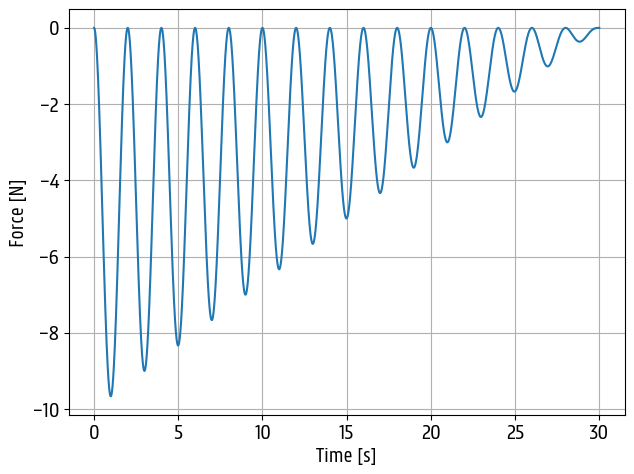

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

plt.rcParams["font.family"] = "UGent Panno Text"
plt.rcParams["font.size"] = 16  

def descending_sine_wave(time, frequency, max_amplitude, phase_shift = 0, shifted=True):
    max_time = np.max(time)
    time_adjusted = time - max_time
    if shifted:
        y_values = max_amplitude / max_time / 2 * time * (np.sin(2 * np.pi * frequency * time_adjusted - np.pi/2 + phase_shift) + 1)
    else:
        y_values = max_amplitude / max_time * time * np.sin(2 * np.pi * frequency * time_adjusted - np.pi/2 + phase_shift)
        
    return y_values[::-1]



def generate_forces(frequency, max_force, length, sample_rate=200):
  force_rate = abs(max_force) / length

  time = np.linspace(0, abs(max_force) / force_rate, int(abs(max_force) / force_rate * sample_rate))  # Time values from 0 to 2 seconds

  normal_force_values = descending_sine_wave(time, frequency, max_force, 0, True)
  
  return normal_force_values

for freq in [0.5]:
  normal_force_values = generate_forces(freq, -10, 30) 
  time = np.linspace(0, 30, len(normal_force_values))


  plt.plot(time,normal_force_values)
  
plt.tight_layout()
plt.grid(True)
plt.xlabel("Time [s]")
plt.ylabel("Force [N]")

plt.savefig("plots/c3_dswex.pdf", format="pdf", bbox_inches="tight")

Text(0, 0.5, 'Force [N]')

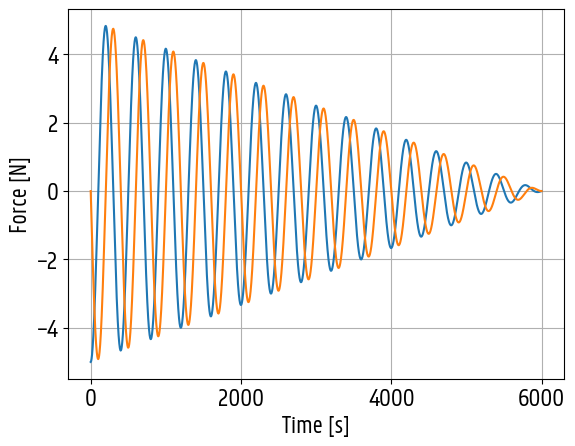

In [2]:
import numpy as np
def generate_xy_forces(frequency, max_force, length, sample_rate=200):
  force_rate = max_force / length

  time = np.linspace(0, abs(max_force) / force_rate, int(abs(max_force) / force_rate * sample_rate))  # Time values from 0 to 2 seconds

  x_force_values = descending_sine_wave(time, frequency, max_force, 0, False)
  y_force_values = descending_sine_wave(time, frequency, max_force, np.pi/2, False)
  
  return x_force_values, y_force_values

x_force_values, y_force_values = generate_xy_forces(0.5, 5, 30)

plt.plot(x_force_values)
plt.plot(y_force_values)
plt.grid(True)
plt.xlabel("Time [s]")
plt.ylabel("Force [N]")

In [3]:
def Bz(z, p):
  return (2 * z ** 2 - p ** 2) / (z ** 2 + p ** 2) ** (5/2)
def Bp(z, p):
  return 3 * z * p / (z ** 2 + p ** 2) ** (5/2)

def Bz_approx(z, p, z0):
  return 2 / (z) ** 3 - 2 / z0 ** 3
def Bp_approx_small(p, z0):
  return 3 / z0 ** 4 * p
def Bp_approx_large(p, z0):
  return 3 / 2**(5/2) * 1 / p ** 3

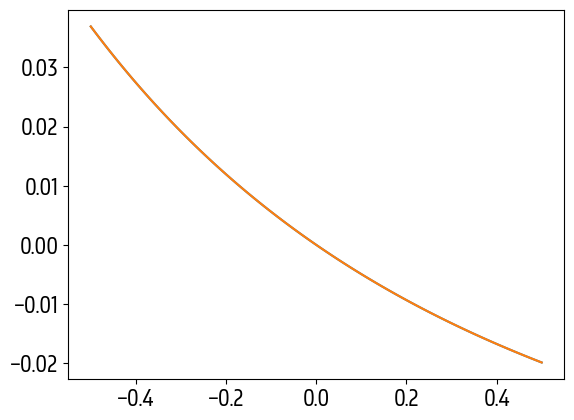

In [4]:
z_vals = np.linspace(2.77, 3.77, 100)
rho_vals = np.linspace(-5, 5, 100)

P0_bias = Bz(np.ones(100) * 3.27, 0)

plt.plot(z_vals - 3.27, Bz(z_vals, 0) - P0_bias, label="z = 2.27")
plt.plot(z_vals - 3.27, Bz_approx(z_vals, 0, 3.27), label="z = 2.37")

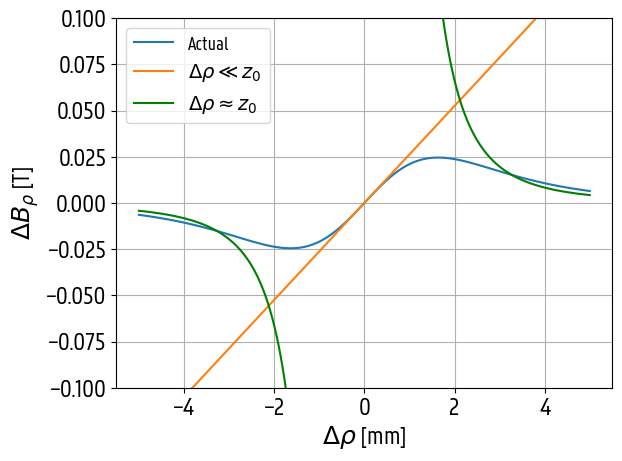

In [5]:
rho_vals = np.linspace(-5, 5, 100)

plt.plot(rho_vals, Bp(3.27, rho_vals), label="Actual")
plt.plot(rho_vals, Bp_approx_small(rho_vals, 3.27), label=fr"$\Delta \rho \ll z_0$")

rho_vals1 = np.linspace(-5, -0.5, 100)
rho_vals2 = np.linspace(0.5, 5, 100)
plt.plot(rho_vals1, Bp_approx_large(rho_vals1, 3.27), c='g', label=fr"$\Delta \rho \approx z_0$")
plt.plot(rho_vals2, Bp_approx_large(rho_vals2, 3.27), c='g')

plt.ylim(-0.1, 0.1)

plt.rcParams["font.size"] = 14  

plt.xlabel(fr"$\Delta \rho$ [mm]")
plt.ylabel(fr"$\Delta B_\rho$ [T]")

plt.grid()
plt.legend()

plt.savefig("plots/c3_condition_analysis1.pdf", format="pdf", bbox_inches="tight")

-0.0007364968291981785
-0.059478902449699764


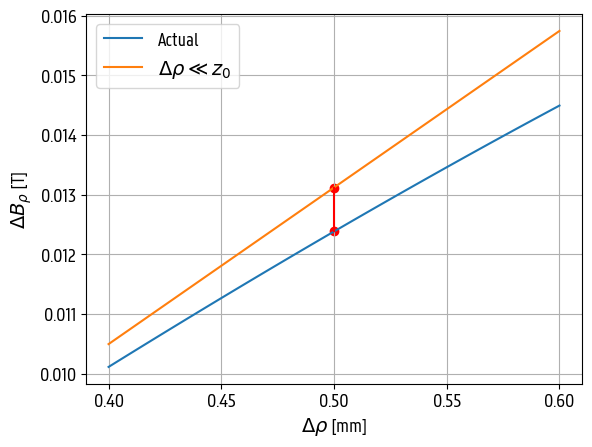

In [6]:
rho_vals = np.linspace(0.4, 0.6, 100)

plt.plot(rho_vals, Bp(3.27, rho_vals), label="Actual")
plt.plot(rho_vals, Bp_approx_small(rho_vals, 3.27), label=fr"$\Delta \rho \ll z_0$")
plt.scatter([0.5, 0.5], [Bp(3.27, 0.5), Bp_approx_small(0.5, 3.27)], c='r')
plt.plot([0.5, 0.5], [Bp(3.27, 0.5), Bp_approx_small(0.5, 3.27)], c='r')

print(Bp(3.27, 0.5) - Bp_approx_small(0.5, 3.27))
print( (Bp(3.27, 0.5) - Bp_approx_small(0.5, 3.27)) / Bp(3.27, 0.5))

# rho_vals1 = np.linspace(-0, -0.5, 100)
# rho_vals2 = np.linspace(0.5, 5, 100)
# plt.plot(rho_vals1, Bp_approx_large(rho_vals1, 3.27), c='g', label=fr"$\Delta \rho \approx z_0$")
# plt.plot(rho_vals2, Bp_approx_large(rho_vals2, 3.27), c='g')

# plt.ylim(-0.1, 0.1)

plt.rcParams["font.size"] = 14  

plt.xlabel(fr"$\Delta \rho$ [mm]")
plt.ylabel(fr"$\Delta B_\rho$ [T]")

plt.grid()
plt.legend()

plt.savefig("plots/c3_condition_analysis2.pdf", format="pdf", bbox_inches="tight")

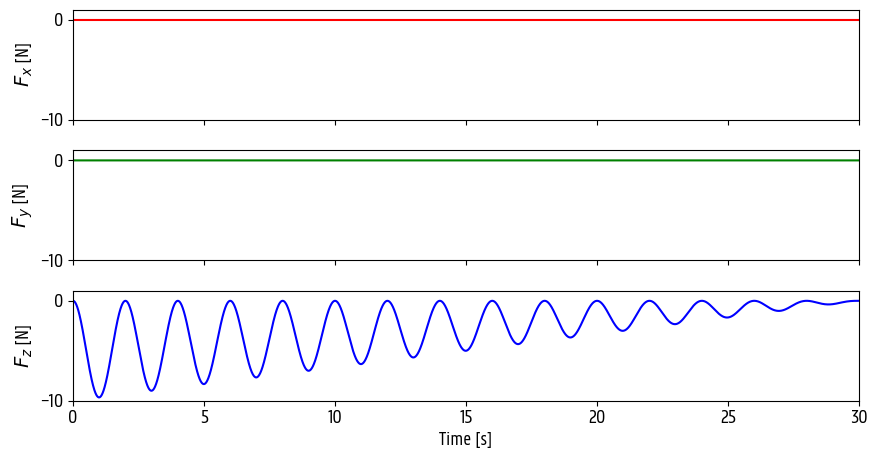

In [7]:
# Create a figure and three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(9, 4.8))

time2 = np.linspace(0, 30 + 3 + 5 + 30 + 3 + 5 + 30 + 3 + 5 + 30, 144 * 200)

# Plot data on each subplot
ax1.plot(time2, np.concatenate((np.zeros(38*200),  y_force_values, np.zeros(46*200), x_force_values)), color='red')
ax1.set_ylabel('$F_x$ [N]')

ax2.plot(time2, np.concatenate((np.zeros(38*2*200),  y_force_values, np.zeros(8*200), y_force_values)), color='green')
ax2.set_ylabel('$F_y$ [N]')

ax3.plot(time2, np.concatenate((normal_force_values, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5)), color='blue')
ax3.set_ylabel('$F_z$ [N]')

plt.xlim(0, 30)
# plt.xlim(30, 30 + 38 + 38 )
# plt.xlim(144-38, 144)
# plt.xlim(144-38, 144)

plt.ylim(-10, 1)
plt.xlabel("Time [s]")

plt.tight_layout()
plt.savefig("plots/c3_dswstageI.pdf", format="pdf", bbox_inches="tight")

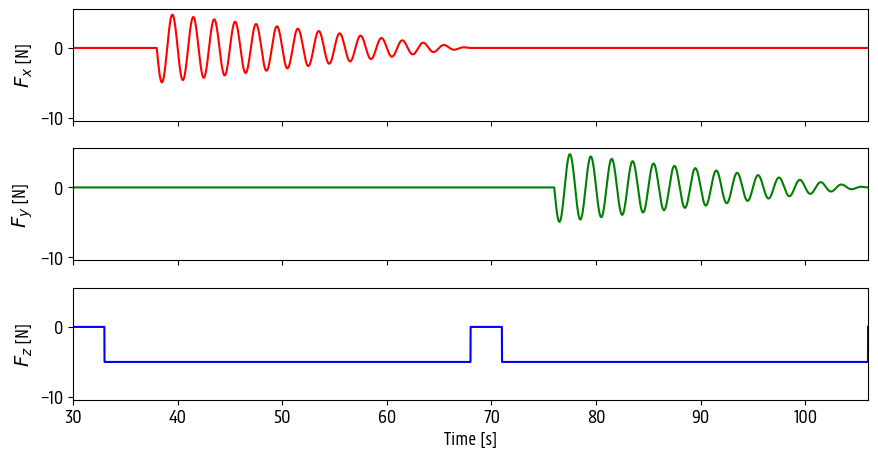

In [8]:
# Create a figure and three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(9, 4.8))

time2 = np.linspace(0, 30 + 3 + 5 + 30 + 3 + 5 + 30 + 3 + 5 + 30, 144 * 200)

# Plot data on each subplot
ax1.plot(time2, np.concatenate((np.zeros(38*200),  y_force_values, np.zeros(46*200), x_force_values)), color='red')
ax1.set_ylabel('$F_x$ [N]')

ax2.plot(time2, np.concatenate((np.zeros(38*2*200),  y_force_values, np.zeros(8*200), y_force_values)), color='green')
ax2.set_ylabel('$F_y$ [N]')

ax3.plot(time2, np.concatenate((normal_force_values, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5)), color='blue')
ax3.set_ylabel('$F_z$ [N]')

# plt.xlim(0, 30)
plt.xlim(30, 30 + 38 + 38 )
# plt.xlim(144-38, 144)
# plt.xlim(144-38, 144)

plt.xlabel("Time [s]")

plt.tight_layout()

plt.tight_layout()
plt.savefig("plots/c3_dswstageII.pdf", format="pdf", bbox_inches="tight")

In [9]:
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

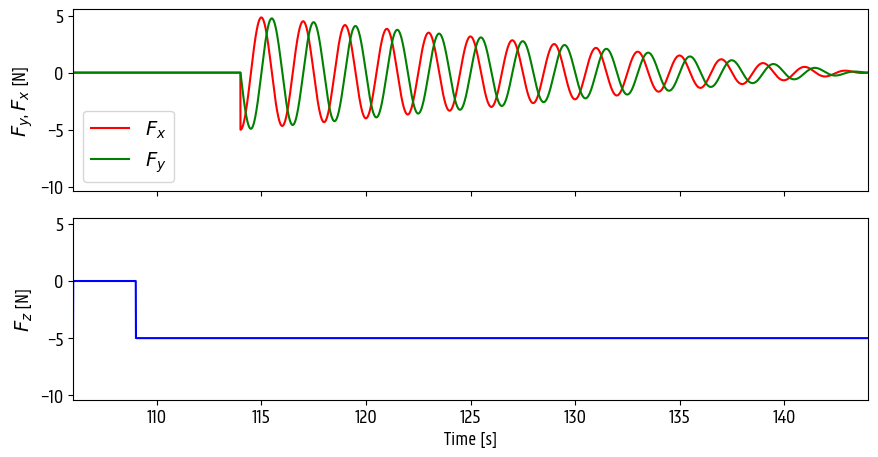

In [10]:
# Create a figure and three subplots
fig, (ax2, ax3) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9, 4.8))

time2 = np.linspace(0, 30 + 3 + 5 + 30 + 3 + 5 + 30 + 3 + 5 + 30, 144 * 200)

# Plot data on each subplot
ax2.plot(time2, np.concatenate((np.zeros(38*200),  y_force_values, np.zeros(46*200), x_force_values)), color='red', label='$F_x$')
ax2.set_ylabel('$F_x$ [N]')

ax2.plot(time2, np.concatenate((np.zeros(38*2*200),  y_force_values, np.zeros(8*200), y_force_values)), color='green', label='$F_y$')
ax2.set_ylabel('$F_y$, $F_x$ [N]')

ax3.plot(time2, np.concatenate((normal_force_values, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5)), color='blue')
ax3.set_ylabel('$F_z$ [N]')

# plt.xlim(0, 30)
# plt.xlim(30, 30 + 38 + 38 )
# plt.xlim(144-38, 144)
plt.xlim(144-38, 144)

plt.xlabel("Time [s]")

ax2.legend()

plt.tight_layout()

plt.tight_layout()
plt.savefig("plots/c3_dswstageIV.pdf", format="pdf", bbox_inches="tight")

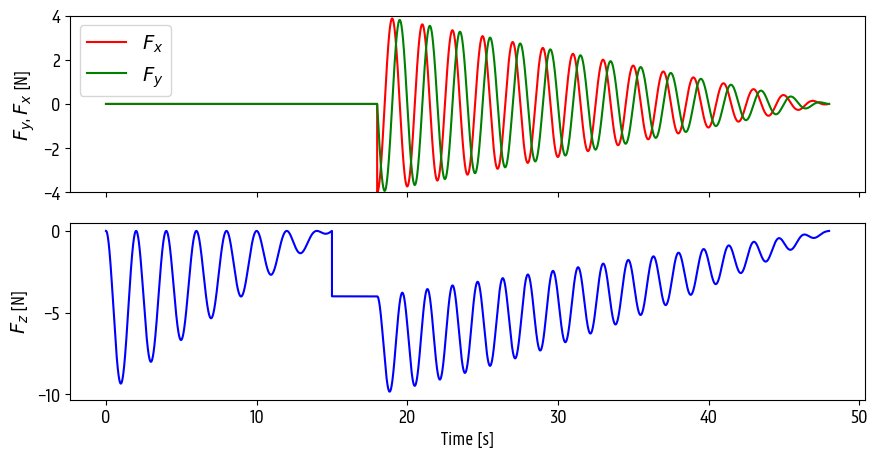

In [11]:
#
# Z component: first without xy
#

sample_rate = 200
max_force = -10
length = 15
force_rate = abs(max_force) / length

time1 = np.linspace(0, abs(max_force) / force_rate, int(abs(max_force) / force_rate * sample_rate))  # Time values from 0 to 2 seconds
normal_force_values1 = descending_sine_wave(time1, freq, max_force, 0, True)

xy_force1 = np.zeros_like(normal_force_values1)

#
# XYZ
# Z from -2 to -10
# add xy component
#

max_force = -10
length = 30
force_rate = abs(max_force) / length

time2 = np.linspace(0, abs(max_force) / force_rate, int(abs(max_force) / force_rate * sample_rate))  # Time values from 0 to 2 seconds
normal_force_values2 = descending_sine_wave(time2, 0.6, max_force, 0, True)

scaler = (1 - 0.6) / (30 - 0) * time2 + 0.6
offset = -4 + (4 - 0) / (30 - 0) * time2

# plt.plot(scaler)
# plt.show()

normal_force_values2 *= scaler
normal_force_values2 += offset

x_force = descending_sine_wave(time2, freq, 4, 0, False)
y_force = descending_sine_wave(time2, freq, 4, np.pi/2, False)


# Combine them
time = np.concatenate([time1, np.linspace(15, 18, 600), np.linspace(18, 18+abs(max_force) / force_rate, int(abs(max_force) / force_rate * sample_rate))])
normal_force_values = np.concatenate([normal_force_values1, np.ones(600) * (-4), normal_force_values2])
x_force = np.concatenate([xy_force1, np.zeros(600), x_force])
y_force = np.concatenate([xy_force1, np.zeros(600), y_force])

# Create a figure and three subplots
fig, (ax2, ax3) = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(9, 4.8))

# Plot data on each subplot
ax2.plot(time, x_force, color='red', label='$F_x$')
ax2.set_ylabel('$F_x$ [N]')
ax2.set_ylim(-4, 4)

ax2.plot(time, y_force, color='green', label='$F_y$')
ax2.set_ylabel('$F_y$, $F_x$ [N]')

ax3.plot(time, normal_force_values, color='blue')
ax3.set_ylabel('$F_z$ [N]')

# plt.xlim(0, 30)
# plt.xlim(30, 30 + 38 + 38 )
# plt.xlim(144-38, 144)
# plt.xlim(144-38, 144)

plt.xlabel("Time [s]")

ax2.legend(loc='upper left')

plt.tight_layout()

plt.tight_layout()
plt.savefig("plots/c3_spiral.pdf", format="pdf", bbox_inches="tight")

In [12]:
poses = np.array([[0.32622918, 0.01839077],
         [0.326038, 0.01238632],
         [0.27610704, 0.01556337],
         [0.29822516, 0.03384517],
         [0.29828956, 0.00443761]])
x_pose_1, x_pose_2, x_pose_3, y_pose_1, y_pose_2 = poses

Width x: 0.04620182376109058, width y: 0.02540763051511631


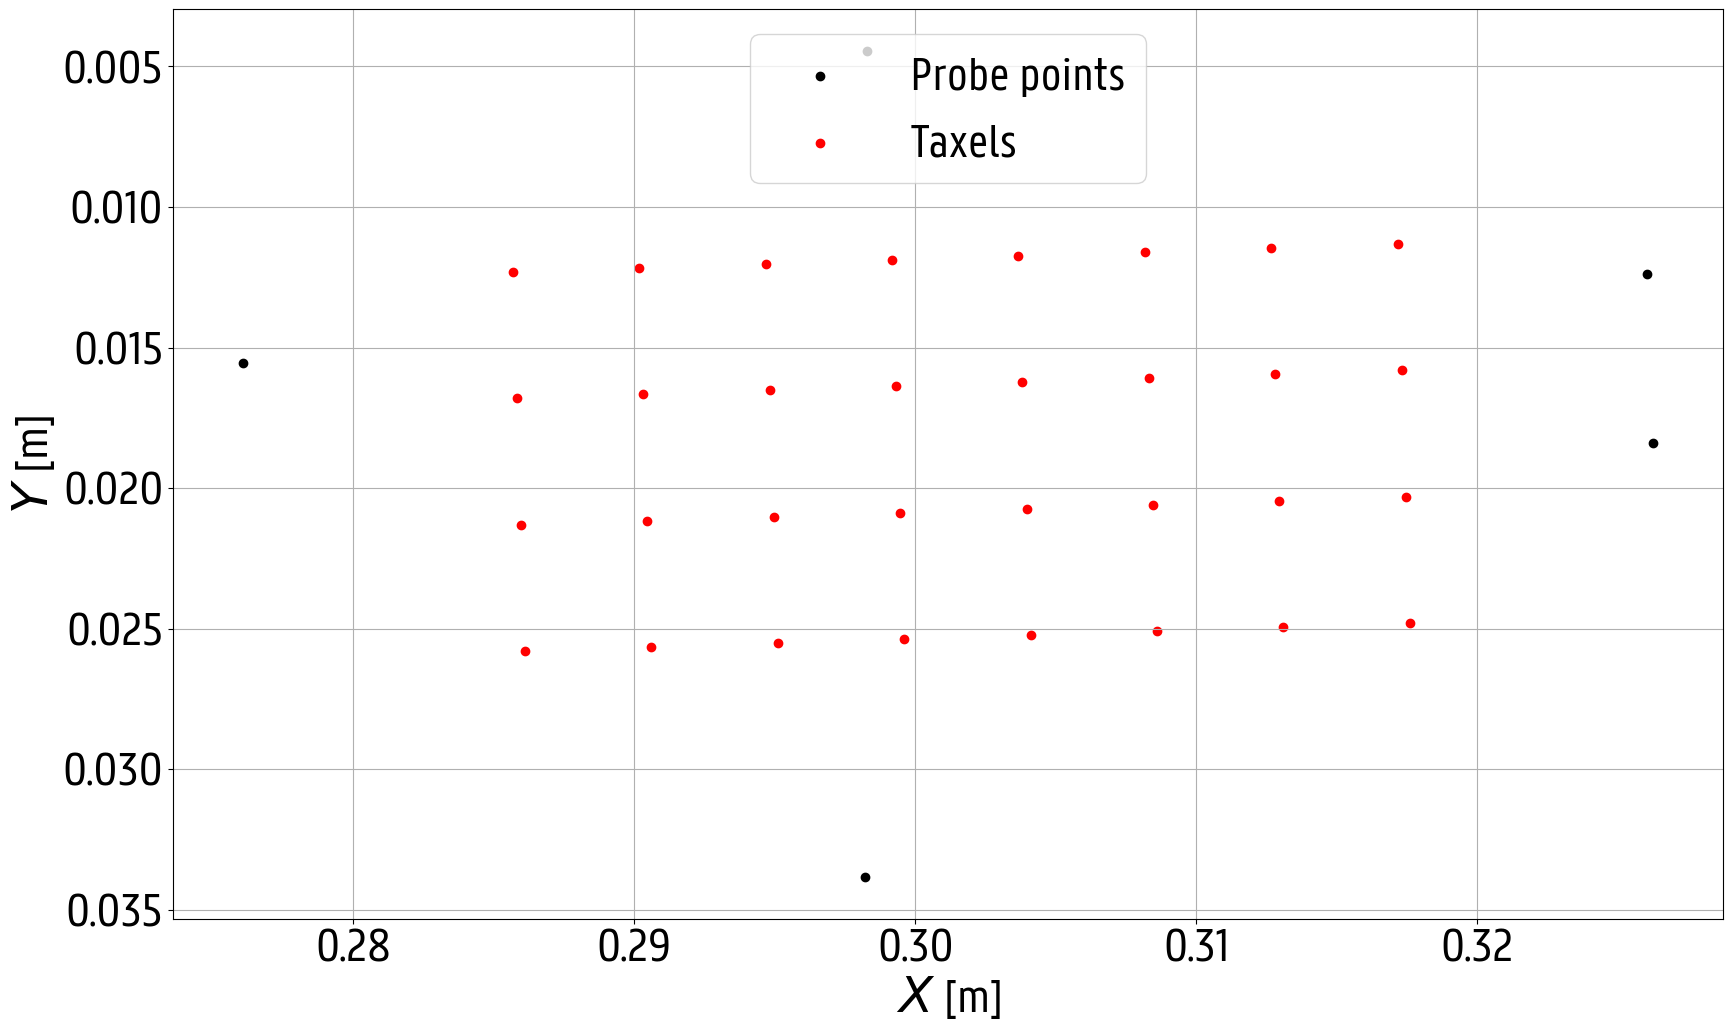

In [15]:
from tools.helpers import *
import matplotlib.pyplot as plt
import matplotlib

tool_width = 0.004 / 2 # We want radius
pitch = 0.0045
# 7mm for my design, 6mm for remko design
offset = (0.09 + pitch / 2, 0.0025 + pitch / 2) # Offset should be the position of the first sensor, NOT the corner of the silicon
sensor_grid_size = (8, 4)
nr_of_subpoints = 0

grid_size = (sensor_grid_size[0] + (sensor_grid_size[0] - 1) * nr_of_subpoints, sensor_grid_size[1] + (sensor_grid_size[1] - 1) * nr_of_subpoints )

width_x = np.linalg.norm(np.array(x_pose_1) - np.array(x_pose_3)) - 2 * tool_width
width_y = np.linalg.norm(np.array(y_pose_1) - np.array(y_pose_2)) - 2 * tool_width

print(f"Width x: {width_x}, width y: {width_y}")

offset = ( (width_x - pitch * (sensor_grid_size[0] - 1)) / 2, offset[1])

offset = ( (width_x - pitch * (sensor_grid_size[0] - 1)) / 2, (width_y - pitch * (sensor_grid_size[1] - 1)) / 2)

offset = (offset[0] + 0.0005, offset[1] + 0.00045)


corners, deltas = get_square_corners(x_pose_1, x_pose_2, y_pose_1, width_x, width_x, tool_width)


fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True, sharey=False)

ax.scatter(poses[:, 0], poses[:, 1], c='black', label='Probe points')

grid = calculate_grid_on_square(corners, offset, grid_size, pitch / (nr_of_subpoints + 1))

# Add startpoint index 2,3,4,5 to grid
actual_grid = np.zeros((grid_size[1], grid_size[0], 6))
# actual_grid[:, :, 2:] = start_point[2:]
actual_grid[:, :, :2] = grid

grid = actual_grid

# matplotlib.rcParams["figure.dpi"] = 1200

ax.grid()
ax.scatter(grid[:, :, 0], grid[:, :, 1], c='red', label='Taxels')
# plt.scatter(grid[2:5, 4:7, 0], grid[2:5, 4:7, 1], c='green', label='Start point')

ax.legend(loc='upper center')

plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()

ax.set_xlabel('$X$ [m]')
ax.set_ylabel('$Y$ [m]')
plt.rcParams["font.size"] = 40  
plt.savefig("plots/homing_procedure.pdf", format="pdf", bbox_inches="tight")

In [31]:
np.rad2deg(np.arctan2(grid[0, -1, 1] - grid[0, 0, 1], grid[0, -1, 0] - grid[0, 0, 0]))

-1.8236654212410517

In [32]:
transform = np.array([[np.sqrt(2)/2,-np.sqrt(2)/2, 0],
               [-np.sqrt(2)/2, -np.sqrt(2)/2, 0],
               [0, 0, 1]])         

np.linalg.det(transform)

-1.0

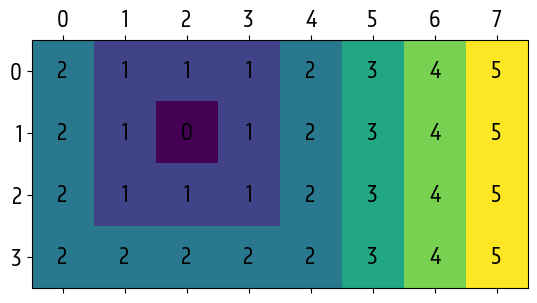

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "UGent Panno Text"
plt.rcParams["font.size"] = 18  

# Define the dimensions of the array
rows, cols = 4, 8

# Create a 4x8 array with configurable numbers
numbers = np.array([2, 1, 1, 1, 2, 3, 4, 5,    2, 1, 0, 1, 2, 3, 4, 5,    2, 1, 1, 1, 2, 3, 4, 5,    2, 2, 2, 2, 2, 3, 4, 5]).reshape(rows, cols)

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Create a color map for visualization (optional)
cmap = plt.get_cmap('viridis')

# Create the array plot
cax = ax.matshow(numbers, cmap=cmap)

# Loop over data dimensions and create text annotations
for i in range(rows):
    for j in range(cols):
        c = numbers[i, j]
        ax.text(j, i, str(c), va='center', ha='center', color='black')


# Set the title and labels (optional)
ax.set_xticks(np.arange(cols))
ax.set_yticks(np.arange(rows))

# Show the plot
plt.savefig("plots/c3_neighbours.pdf", format="pdf", bbox_inches="tight")
plt.show()